In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [57]:
train_df = pd.read_csv("train_set.csv")
train_df

,label,id_img,path
0,happy,22373,happy/22373.jpg
1,happy,21433,happy/21433.jpg
2,happy,12418,happy/12418.jpg
3,happy,21278,happy/21278.jpg
4,happy,8081,happy/08081.jpg
...,...,...,...
6171,sadness,11346,sadness/11346.jpg
6172,sadness,4441,sadness/04441.jpg
6173,sadness,15236,sadness/15236.jpg
6174,sadness,27361,sadness/27361.jpg


In [58]:
img = cv2.imread("train/happy/00007.jpg", 0) 
img.shape

(48, 48)

In [59]:
#plt.imshow(img, cmap = 'gray')

In [60]:
train_df = train_df.sample(frac=1)

In [61]:
train_df

,label,id_img,path
1624,happy,7553,happy/07553.jpg
1087,happy,13284,happy/13284.jpg
1540,happy,26216,happy/26216.jpg
442,happy,17741,happy/17741.jpg
3777,sadness,19663,sadness/19663.jpg
...,...,...,...
1212,happy,22935,happy/22935.jpg
4480,sadness,19528,sadness/19528.jpg
3094,happy,9957,happy/09957.jpg
5277,sadness,13488,sadness/13488.jpg


In [62]:
train_df.label = train_df.label.replace('sadness', 0)
train_df.label = train_df.label.replace('happy', 1)

In [63]:
%%time
train_df['array'] = train_df.path.apply(lambda x: cv2.imread(f'train/{x}', 0))

Wall time: 1.38 s


In [64]:
#%%time
#train_set['array2'] =  [cv2.imread(f'train/{x}', 0) for x in train_set.path]        otra manera

In [65]:
len(train_df)

6176

In [66]:
train_images = np.stack(train_df.array)
train_labels = np.array(train_df.label)

In [67]:
train_images = train_images/255.0

In [68]:
train_images.shape

(6176, 48, 48)

In [69]:
train_images = train_images.reshape(6176, 48, 48, 1)

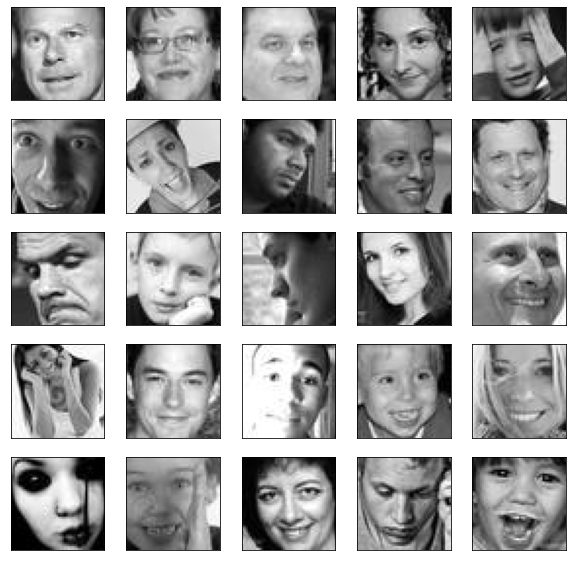

In [70]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
plt.show()

In [93]:
model = models.Sequential([
        layers.Conv2D(filters=32,
                        kernel_size=(4, 4),
                        input_shape=(48, 48, 1),
                        padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), 
                              padding="same"),
        layers.Conv2D(filters=16,
                        kernel_size=(3, 3),
                        input_shape=(6, 6, 1),
                        padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), 
                        padding="same"),                                           
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(16),
        layers.Dense(2, activation='softmax'),
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        544       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)               

In [94]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)

In [95]:
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [96]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
193/193 [==============================] - 6s 28ms/step - loss: 1.9407 - accuracy: 0.5505
Epoch 2/20
193/193 [==============================] - 6s 29ms/step - loss: 0.5871 - accuracy: 0.6930
Epoch 3/20
193/193 [==============================] - 6s 29ms/step - loss: 0.5505 - accuracy: 0.7307
Epoch 4/20
193/193 [==============================] - 6s 30ms/step - loss: 0.5242 - accuracy: 0.7382
Epoch 5/20
193/193 [==============================] - 6s 29ms/step - loss: 0.4971 - accuracy: 0.7632
Epoch 6/20
193/193 [==============================] - 6s 30ms/step - loss: 0.4970 - accuracy: 0.7654
Epoch 7/20
193/193 [==============================] - 6s 30ms/step - loss: 0.4845 - accuracy: 0.7558
Epoch 8/20
193/193 [==============================] - 6s 31ms/step - loss: 0.4703 - accuracy: 0.7795
Epoch 9/20
193/193 [==============================] - 6s 33ms/step - loss: 0.4727 - accuracy: 0.7765
Epoch 10/20
193/193 [==============================] - 6s 33ms/step - loss: 0.4687 - accura

In [97]:
test_loss, test_acc = model.evaluate(train_images, train_labels, verbose=2)

print('\nTest accuracy:', test_acc, "\nLoss:", test_loss)

193/193 - 2s - loss: 0.3538 - accuracy: 0.8446

Test accuracy: 0.8445596098899841 
Loss: 0.3538452982902527


In [98]:
test_df = pd.read_csv('C:\\DATA_SCIENCE\\DEEP_LEARNING\\Competition Kaggle 26_02_21\\test_set.csv')

In [99]:
test_df

,id_img,path
0,18341,test/18341.jpg
1,13176,test/13176.jpg
2,23945,test/23945.jpg
3,15968,test/15968.jpg
4,18382,test/18382.jpg
...,...,...
4112,8966,test/08966.jpg
4113,12111,test/12111.jpg
4114,16629,test/16629.jpg
4115,24322,test/24322.jpg


In [100]:
test_df['array'] = test_df.path.apply(lambda x: cv2.imread(f'{x}', 0))

In [101]:
test_df

,id_img,path,array
0,18341,test/18341.jpg,"[[124, 69, 19, 5, 8, 9, 18, 34, 23, 4, 0, 2, 7..."
1,13176,test/13176.jpg,"[[7, 3, 2, 5, 5, 2, 2, 5, 46, 35, 37, 37, 19, ..."
2,23945,test/23945.jpg,"[[88, 78, 136, 145, 128, 75, 203, 130, 178, 14..."
3,15968,test/15968.jpg,"[[254, 255, 255, 255, 254, 254, 254, 255, 255,..."
4,18382,test/18382.jpg,"[[9, 2, 8, 25, 12, 55, 143, 140, 89, 70, 56, 6..."
...,...,...,...
4112,8966,test/08966.jpg,"[[168, 168, 168, 169, 169, 169, 170, 170, 162,..."
4113,12111,test/12111.jpg,"[[11, 14, 15, 12, 9, 10, 12, 14, 9, 9, 9, 9, 1..."
4114,16629,test/16629.jpg,"[[131, 89, 70, 158, 246, 81, 70, 86, 87, 83, 8..."
4115,24322,test/24322.jpg,"[[20, 27, 28, 23, 29, 45, 56, 55, 46, 57, 108,..."


In [102]:
test_images = np.stack(test_df.array)

In [103]:
test_images = test_images/255

In [104]:
test_images = test_images.reshape(4117, 48, 48, 1)

In [105]:
test_images.shape

(4117, 48, 48, 1)

In [106]:
predictions = []
for pos, val in enumerate(model.predict(test_images)):
    if val[0] > val[1]:
        predictions.append("sadness")
    if val[0] < val[1]:
        predictions.append("happy")

In [107]:
pd.DataFrame(predictions).value_counts()

sadness    2179
happy      1938
dtype: int64

In [108]:
model.save('C:\\DATA_SCIENCE\\DEEP_LEARNING\\Competition Kaggle 26_02_21\\model1')

INFO:tensorflow:Assets written to: C:\DATA_SCIENCE\DEEP_LEARNING\Competition Kaggle 26_02_21\model1\assets


In [109]:
model.save('C:\\DATA_SCIENCE\\DEEP_LEARNING\\Competition Kaggle 26_02_21\\model1.h5')

In [110]:
submission = pd.DataFrame({"id_img": test_df["id_img"], "label": predictions})
submission

,id_img,label
0,18341,happy
1,13176,happy
2,23945,sadness
3,15968,happy
4,18382,happy
...,...,...
4112,8966,sadness
4113,12111,sadness
4114,16629,happy
4115,24322,happy


In [111]:
submission = submission.replace(1, 'happy')
submission = submission.replace(0, 'sadness')

In [112]:
submission

,id_img,label
0,18341,happy
1,13176,happy
2,23945,sadness
3,15968,happy
4,18382,happy
...,...,...
4112,8966,sadness
4113,12111,sadness
4114,16629,happy
4115,24322,happy


In [113]:
submission.to_csv("first2.csv", index = False)